<a href="https://colab.research.google.com/github/krishnakumar51/Stock-Price-Prediction-Model/blob/main/Stacked_LSTM_Stock_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key='619718015f153a30c0bf3aa266d8fb679b9dc7a6')

<ipython-input-10-e710c1068576>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='619718015f153a30c0bf3aa266d8fb679b9dc7a6')


In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-12-19 00:00:00+00:00  160.89  167.45  159.09  166.00  49047297   
       2018-12-20 00:00:00+00:00  156.83  162.11  155.30  160.40  64772960   
       2018-12-21 00:00:00+00:00  150.73  158.16  149.63  156.86  95744384   
       2018-12-24 00:00:00+00:00  146.83  151.55  146.59  148.15  37169232   
       2018-12-26 00:00:00+00:00  157.17  157.23  146.72  148.30  58582544   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-12-19 00:00:00+00:00  38.604781  40.178821  38.172880  39.830901   
       2018-12-20 00:00:00+00:00  37.630603  38.897514  37.263487  38.487208   
       2018-12-21 00:00:00+00:00  36.166938  37.949730  35.902998  37.637802   
       2018-12-24 00:00:00+00:00  35.231152  36.363693  35.173565  35.547879   
       2018-12-26 00:00:00+00:00  37.712185  37.726581  35.204758  35.583871   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-12-19 00:00:00+00:00  196189188      0.0          1.0  
       2018-12-20 00:00:00+00:00  259091840      0.0          1.0  
       2018-12-21 00:00:00+00:00  382977536      0.0          1.0  
       2018-12-24 00:00:00+00:00  148676928      0.0          1.0  
       2018-12-26 00:00:00+00:00  234330176      0.0          1.0

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-12-19 00:00:00+00:00,160.89,167.45,159.09,166.00,49047297,38.604781,40.178821,38.172880,39.830901,196189188,0.0,1.0
1,AAPL,2018-12-20 00:00:00+00:00,156.83,162.11,155.30,160.40,64772960,37.630603,38.897514,37.263487,38.487208,259091840,0.0,1.0
2,AAPL,2018-12-21 00:00:00+00:00,150.73,158.16,149.63,156.86,95744384,36.166938,37.949730,35.902998,37.637802,382977536,0.0,1.0
3,AAPL,2018-12-24 00:00:00+00:00,146.83,151.55,146.59,148.15,37169232,35.231152,36.363693,35.173565,35.547879,148676928,0.0,1.0
4,AAPL,2018-12-26 00:00:00+00:00,157.17,157.23,146.72,148.30,58582544,37.712185,37.726581,35.204758,35.583871,234330176,0.0,1.0


In [ ]:
df_x = df['close']
df_x

0       160.89
1       156.83
2       150.73
3       146.83
4       157.17
         ...  
1252    193.18
1253    194.71
1254    197.96
1255    198.11
1256    197.57
Name: close, Length: 1257, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

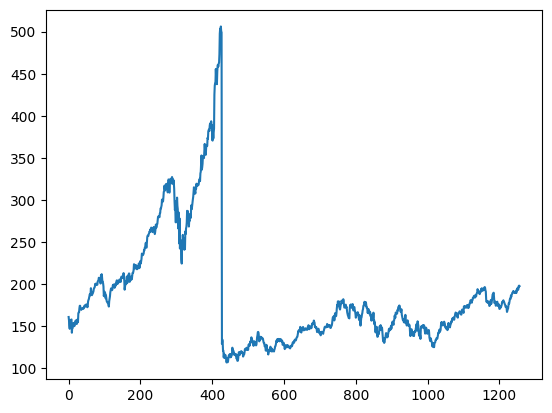

In [ ]:
plt.plot(df_x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler as mm

In [ ]:
scaler = mm(feature_range=(0,1))
df_x = scaler.fit_transform(np.array(df_x).reshape(-1, 1) )

In [ ]:
df_x.shape

(1257, 1)

In [ ]:
# train, test split, now splitting has to be done in a different way
training_size = int(len(df_x)*0.7)
training_data, test_data = df_x[0:training_size,:], df_x[training_size:,:]
training_data.shape, test_data.shape

((879, 1), (378, 1))

In [ ]:
# method for calculations of training dataset and time-steps moving
def create_data(data, time_steps=1):
  dataX, dataY=[],[]
  for i in range(len(data)- time_steps-1):
    a = data[i:(i+time_steps), 0]
    dataX.append(a)
    dataY.append(data[i+time_steps,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_steps=100
x_train, y_train = create_data(training_data, time_steps)
x_test, y_test = create_data(test_data, time_steps)

In [ ]:
x_train.shape, y_train.shape

((778, 100), (778,))

In [ ]:
# reshaping data for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [ ]:
x_train.shape, y_train.shape

((778, 100, 1), (778,))

In [ ]:
# creating the model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile('adam', 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           30200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=1, batch_size=64)

Epoch 1/25
13/13 [==============================] - 14s 466ms/step - loss: 0.0272 - val_loss: 0.0012
Epoch 2/25
13/13 [==============================] - 6s 463ms/step - loss: 0.0122 - val_loss: 0.0017
Epoch 3/25
13/13 [==============================] - 5s 401ms/step - loss: 0.0102 - val_loss: 5.1887e-04
Epoch 4/25
13/13 [==============================] - 4s 334ms/step - loss: 0.0075 - val_loss: 8.4928e-04
Epoch 5/25
13/13 [==============================] - 8s 614ms/step - loss: 0.0073 - val_loss: 5.0986e-04
Epoch 6/25
13/13 [==============================] - 10s 746ms/step - loss: 0.0073 - val_loss: 2.1843e-04
Epoch 7/25
13/13 [==============================] - 11s 807ms/step - loss: 0.0063 - val_loss: 7.3643e-04
Epoch 8/25
13/13 [==============================] - 10s 802ms/step - loss: 0.0050 - val_loss: 6.3731e-04
Epoch 9/25
13/13 [==============================] - 5s 383ms/step - loss: 0.0048 - val_loss: 4.9366e-04
Epoch 10/25
13/13 [==============================] - 6s 474ms/step -

In [ ]:
len(test_data)

378

In [ ]:
x_input= test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.22975647]
101
1 day input [0.22289292 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793
 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082  0.18189105
 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405 0.17630557
 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293 0.20240451
 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212 0.17868503
 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515 0.17815905
 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517 0.16310582
 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789 0.16736381
 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264 0.18502192
 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226 0.16541014
 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826 0.15892298
 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497 0.18780213
 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062
 0.20756418 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154
 0.20776456 0.20929242 0.20671259 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df)

1257

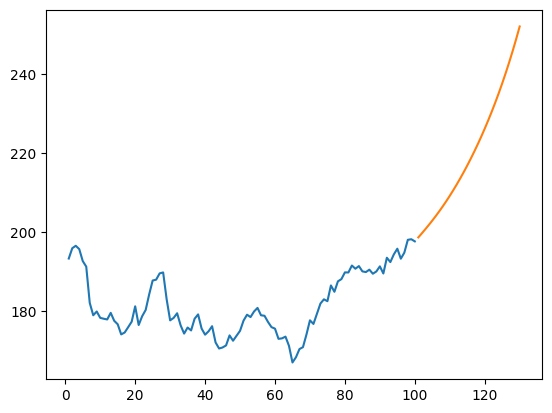

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df_x[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


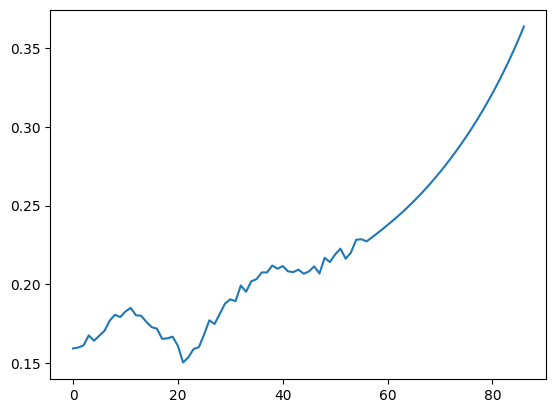

In [ ]:
dfn=df_x.tolist()
dfn.extend(lst_output)
plt.plot(dfn[1200:])